A notebook for capturing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

Fifth round of experiments after procedure upgrade adding 8th camera, and switching some camera positions, and setting to switch from 30 FPS to 1 FPS for exposures longer than 500 ms.

Using a gain of 4.27 dB to raise apparent full well to 20000 e-, and sensitivity to 4.88 e-/DN.
Reducing Blacklevel to 8 DN from 128 DN, to increase sensitive range.

# Process Overview

The objective of this notebook is to capture uniformly illuminated and dark images (across the sampling area) that can be used to characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will  capture images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=255).

For each exposure, we will capture:
- 2 illuminated images of the target
- 25 dark images (to reduce read noise by factor of 5)

We will choose exposures with the following procedure:
1. Start at minimum exposure - capture pair, record exposure
2. Double exposure - capture pair, record exposure
3. Repeat until all pixels are saturated - i.e. all = 255
4. Reduce exposure by factor of 0.90, and repeat, until 0 pixels are saturated.

This process will be repeated for SCT99 and SCT5, and then again for dark images.
Then, 25 dark frames will be captured for each exposure, and the mean and standard deviation TIFF float images recorded.


# Camera Setup

Here we configure and setup the camera capture objects.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Brightness Value set to 0
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Expo

In [3]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import sleep

Here we are only going to process images over the calibration target itself, so we restrict the ROI to a very small field of 32x32 pixels.
Statistics are therfore computed over 1024 pixels in each case.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 320.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.1215406283736229
Exposure set to 0.12154000252485275 (err of 6.282480171510008e-07
Trial 1:
Imaging with Exposure: 0.12154000252485275 s
+Good exposure 0.12154000252485275 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.12154000252485275
Exposure Value set to 0.02309259958565235
Exposure set to 0.0230919998139143 (err of 6.006658077213622e-07
Trial 2:
Imaging with Exposure: 0.0230919998139143 s
+Good exposure 0.0230919998139143 Image recieved
Quantile: 3708.0, Target: 3889.2999999999997
Exposure current Value: 0.0230919998139143
Exposure Value 

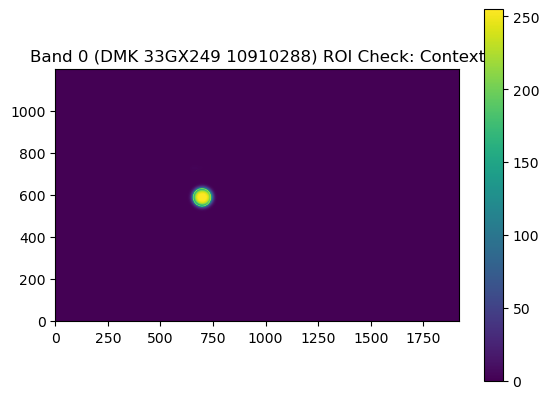

Imaging with Exposure: 0.02422099933028221 s
+Good exposure 0.02422099933028221 Image recieved


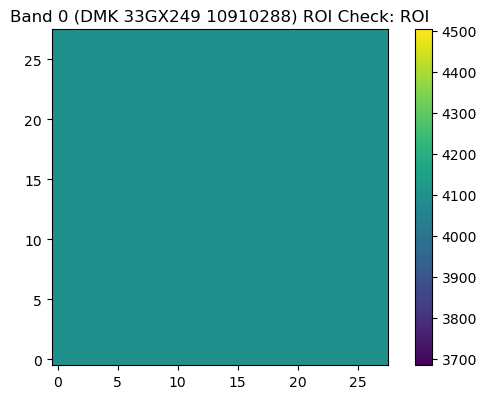

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 391.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0994705930352211
Exposure set to 0.09946999698877335 (err of 5.959711201763973e-07
Trial 1:
Imaging with Exposure: 0.09946999698877335 s
+Good exposure 0.09946999698877335 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.09946999698877335
Exposure Value set to 0.018899299204349518
Exposure set to 0.01889899931848049 (err of 3.0010938644256524e-07
Trial 2:
Imaging with Exposure: 0.01889899931848049 s
+Good exposure 0.01889899931848049 Image recieved
Quantile: 3693.0, Target: 3889.2999999999997
Exposure current 

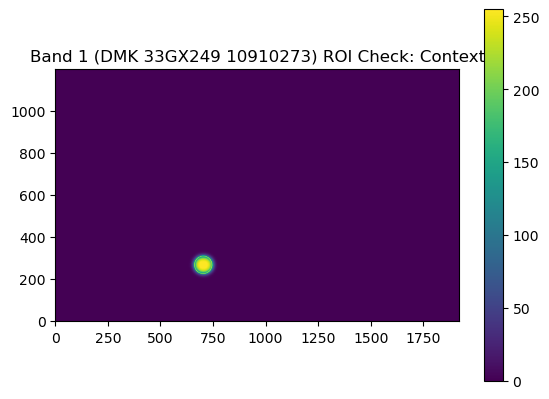

Imaging with Exposure: 0.019903000444173813 s
+Good exposure 0.019903000444173813 Image recieved


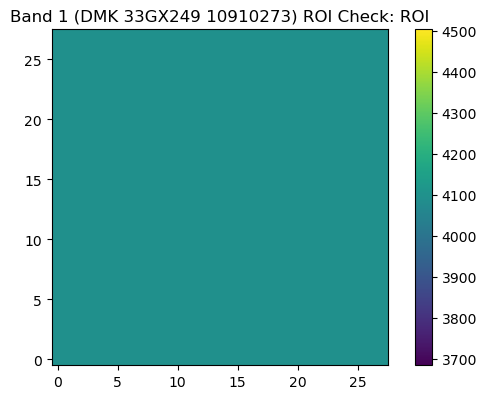

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 100.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.3889300227165222
Exposure set to 0.38892999291419983 (err of 2.5558983873796848e-08
Trial 1:
Imaging with Exposure: 0.38892999291419983 s
+Good exposure 0.38892999291419983 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.38892999291419983
Exposure Value set to 0.07389669865369797
Exposure set to 0.07389599829912186 (err of 7.003545760969621e-07
Trial 2:
Imaging with Exposure: 0.07389599829912186 s
+Good exposure 0.07389599829912186 Image recieved
Quantile: 3713.0, Target: 3889.2999999999997
Exposure current V

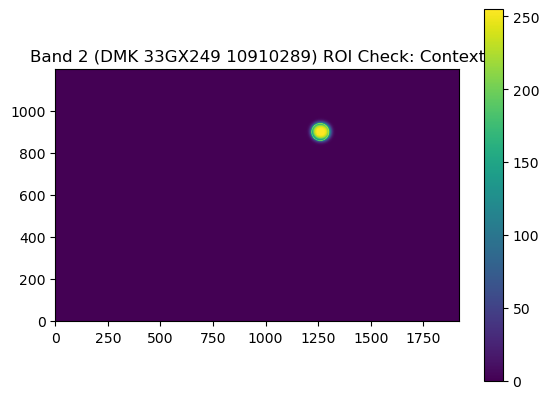

Imaging with Exposure: 0.07740399986505508 s
+Good exposure 0.07740399986505508 Image recieved


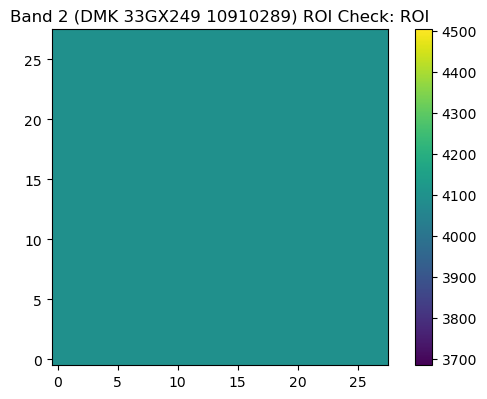

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1503.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0051753828302025795
Exposure set to 0.0051750000566244125 (err of 3.8275739000850906e-07
Trial 1:
Imaging with Exposure: 0.0051750000566244125 s
+Good exposure 0.0051750000566244125 Image recieved
Quantile: 3865.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.0051750000566244125
Imaging with Exposure: 0.0051750000566244125 s
+Good exposure 0.0051750000566244125 Image recieved
x: 264
y: 984


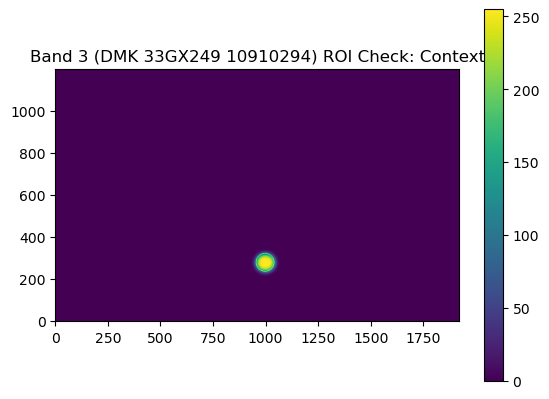

Imaging with Exposure: 0.0051750000566244125 s
+Good exposure 0.0051750000566244125 Image recieved


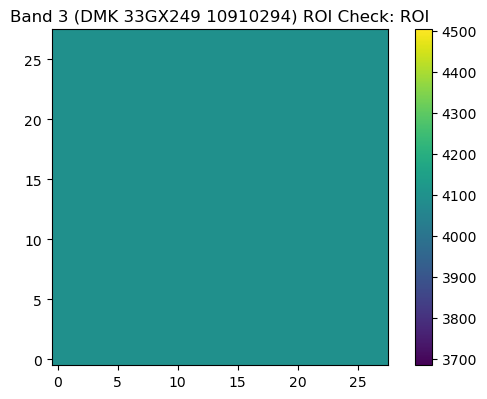

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3287.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0023664741311222315
Exposure set to 0.002366000087931752 (err of 4.7401290903699433e-07
Trial 1:
Imaging with Exposure: 0.002366000087931752 s
+Good exposure 0.002366000087931752 Image recieved
Quantile: 3892.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.002366000087931752
Imaging with Exposure: 0.002366000087931752 s
+Good exposure 0.002366000087931752 Image recieved
x: 586
y: 1238


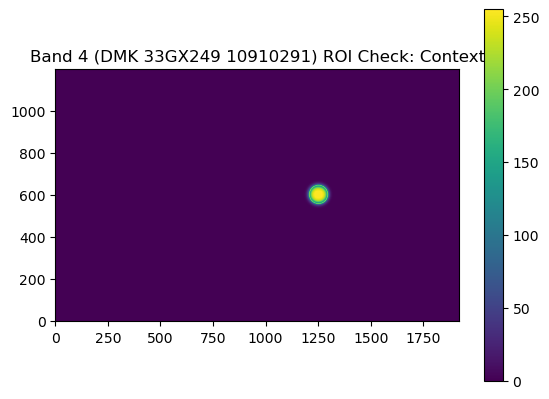

Imaging with Exposure: 0.002366000087931752 s
+Good exposure 0.002366000087931752 Image recieved


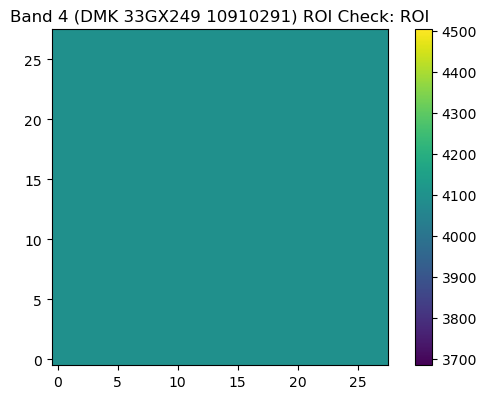

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 165.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.23571516573429108
Exposure set to 0.23571500182151794 (err of 1.6088950247072908e-07
Trial 1:
Imaging with Exposure: 0.23571500182151794 s
+Good exposure 0.23571500182151794 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.23571500182151794
Exposure Value set to 0.04478584975004196
Exposure set to 0.04478500038385391 (err of 8.499622344906865e-07
Trial 2:
Imaging with Exposure: 0.04478500038385391 s
+Good exposure 0.04478500038385391 Image recieved
Quantile: 3719.0, Target: 3889.2999999999997
Exposure current 

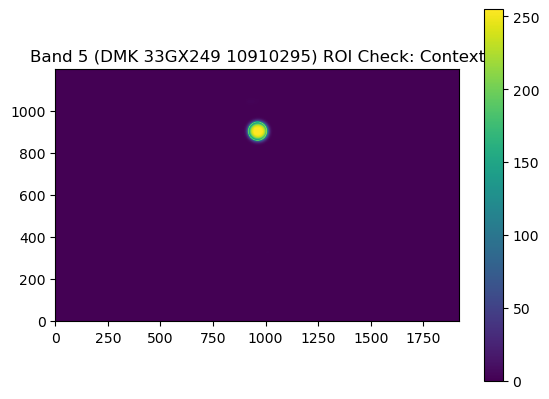

Imaging with Exposure: 0.046835001558065414 s
+Good exposure 0.046835001558065414 Image recieved


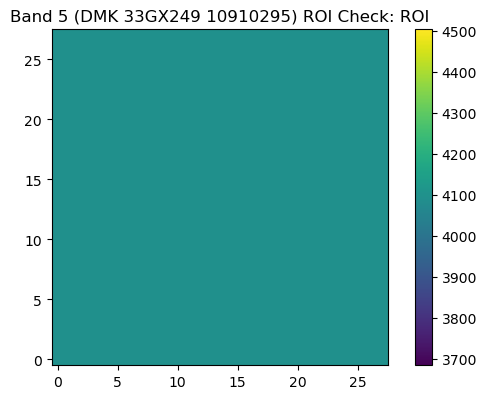

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1657.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.004694387782365084
Exposure set to 0.004693999886512756 (err of 3.877836524061179e-07
Trial 1:
Imaging with Exposure: 0.004693999886512756 s
+Good exposure 0.004693999886512756 Image recieved
Quantile: 3856.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.004693999886512756
Imaging with Exposure: 0.004693999886512756 s
+Good exposure 0.004693999886512756 Image recieved
x: 874
y: 632


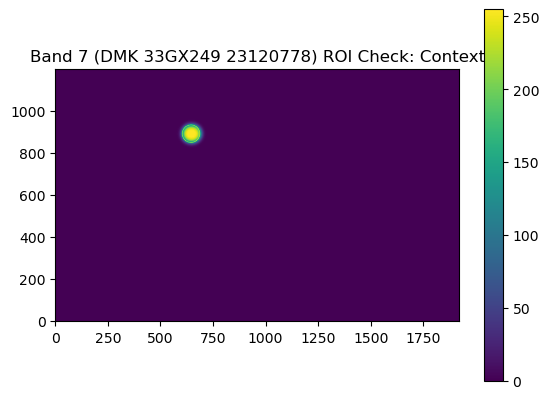

Imaging with Exposure: 0.004693999886512756 s
+Good exposure 0.004693999886512756 Image recieved


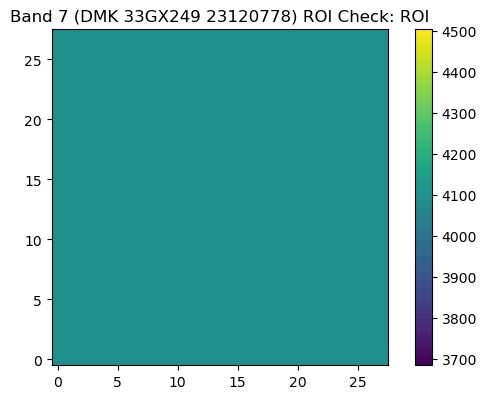

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 667.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.011662069708108902
Exposure set to 0.011661999858915806 (err of 6.966051998777423e-08
Trial 1:
Imaging with Exposure: 0.011661999858915806 s
+Good exposure 0.011661999858915806 Image recieved
Quantile: 3871.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.011661999858915806
Imaging with Exposure: 0.011661999858915806 s
+Good exposure 0.011661999858915806 Image recieved
x: 244
y: 1256


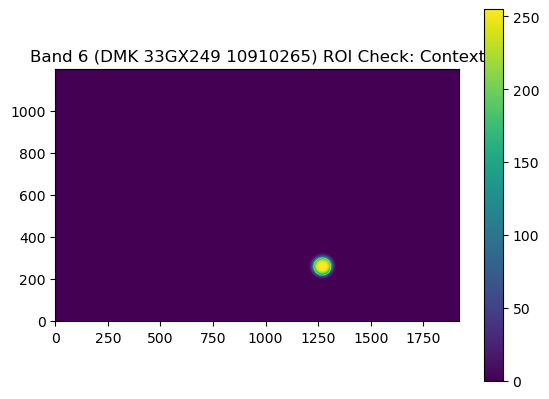

Imaging with Exposure: 0.011661999858915806 s
+Good exposure 0.011661999858915806 Image recieved


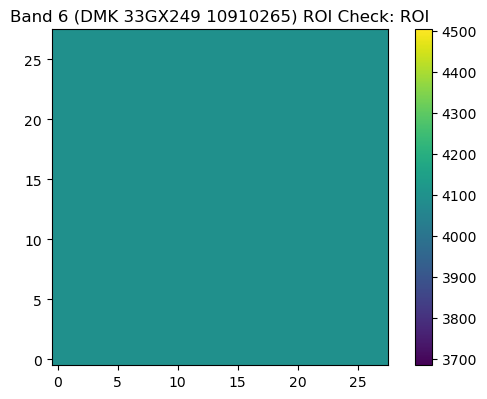

-----------------------------------


In [6]:
osc.find_camera_rois(cameras, roi_size=28)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 502.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.013048605993390083
Exposure set to 0.013047999702394009 (err of 6.064950707432987e-07
Trial 1:
Imaging with Exposure: 0.013047999702394009 s
+Good exposure 0.013047999702394009 Image recieved
Quantile: 3195.0, Target: 3275.2000000000003
Exposure current Value: 0.013047999702394009
Exposure Value set to 0.01337552722543478
Exposure set to 0.013375000096857548 (err of 5.268594118930381e-07
Trial 2:
Imaging with Exposure: 0.013375000096857548 s
+Good exposure 0.013375000096857548 Image recieved
Quantile: 3287.0, Target: 3275.2000000000003
Exposure current Value: 0.013375000096857548
Exposure Value set to 0.

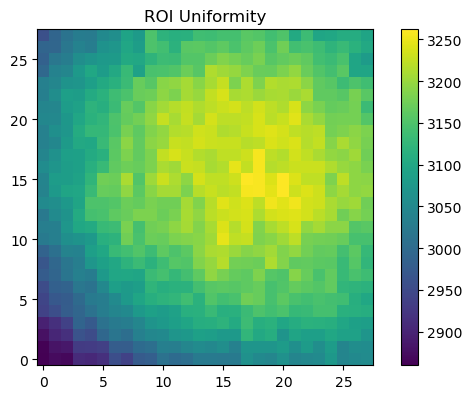

ROI Uniformity: 2.530301781145289 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 681.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009618796408176422
Exposure set to 0.009618000127375126 (err of 7.962178925763341e-07
Trial 1:
Imaging with Exposure: 0.009618000127375126 s
+Good exposure 0.009618000127375126 Image recieved
Quantile: 3217.0, Target: 3275.2000000000003
Exposure current Value: 0.009618000127375126
Exposure Value set to 0.009792002849280834
Exposure set to 0.00979200005531311 (err of 3.0585131302607316e-09
Trial 2:
Imaging with Exposure: 0.00979200005531311 s
+Good exposure 0.00979200005531311 Image recieved
Quantile: 3283.0, Target: 3275.200000000000

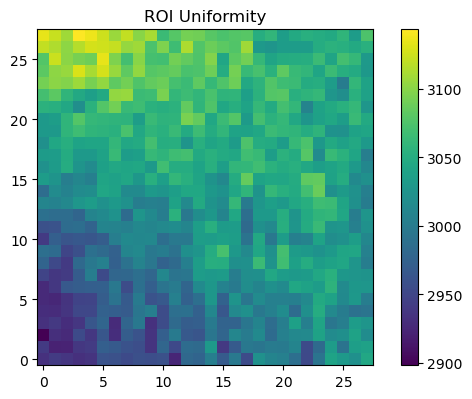

ROI Uniformity: 1.4241762036298755 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 224.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.1462142914533615
Exposure set to 0.14621399343013763 (err of 2.992289540038051e-07
Trial 1:
Imaging with Exposure: 0.14621399343013763 s
+Good exposure 0.14621399343013763 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.14621399343013763
Exposure Value set to 0.023394238203763962
Exposure set to 0.02339399978518486 (err of 2.3916363716194877e-07
Trial 2:
Imaging with Exposure: 0.02339399978518486 s
+Good exposure 0.02339399978518486 Image recieved
Quantile: 2535.0, Target: 3275.2000000000003
Exp

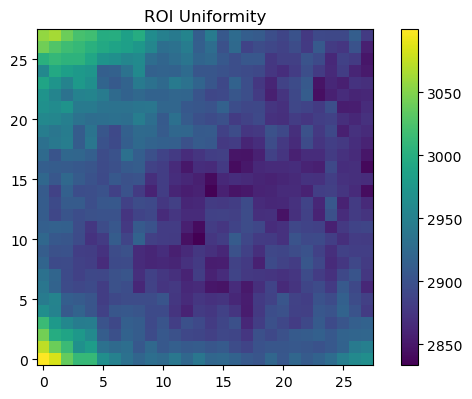

ROI Uniformity: 1.3084590138976366 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2271.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0028843681793659925
Exposure set to 0.0028840000741183758 (err of 3.6818265278498047e-07
Trial 1:
Imaging with Exposure: 0.0028840000741183758 s
+Good exposure 0.0028840000741183758 Image recieved
Quantile: 3247.0, Target: 3275.2000000000003
Exposure current Value: 0.0028840000741183758
Exposure Value set to 0.0029090475291013718
Exposure set to 0.0029090000316500664 (err of 4.740991214674181e-08
Trial 2:
Imaging with Exposure: 0.0029090000316500664 s
+Good exposure 0.0029090000316500664 Image recieved
Quantile: 3278.0, Target: 327

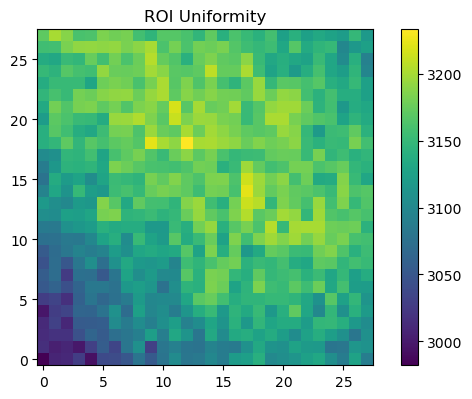

ROI Uniformity: 1.3573482318766716 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0003200000210199505
Exposure set to 0.00031999999191612005 (err of 2.3283064387071006e-11
Trial 1:
Imaging with Exposure: 0.00031999999191612005 s
+Good exposure 0.00031999999191612005 Image recieved
Quantile: 722.0, Target: 3275.2000000000003
Exposure current Value: 0.00031999999191612005
Exposure Value set to 0.0014516121009364724
Exposure set to 0.0014509999891743064 (err of 6.121625205361865e-07
Trial 2:
Imaging with Exposure: 0.0014509999891743064 s
+Good exposure 0.0014509999891743064 Image recieved
Quantile: 3269.0, Target: 

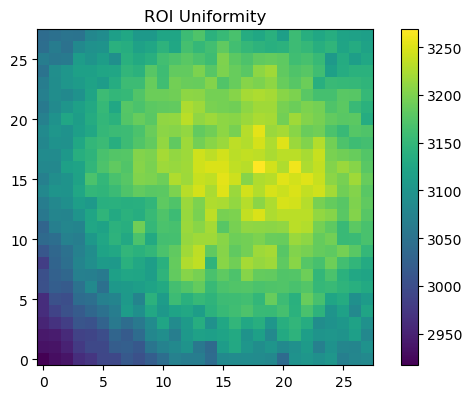

ROI Uniformity: 2.082309337104544 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 255.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.12843921780586243
Exposure set to 0.12843899428844452 (err of 2.2749836536828383e-07
Trial 1:
Imaging with Exposure: 0.12843899428844452 s
+Good exposure 0.12843899428844452 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.12843899428844452
Exposure Value set to 0.020550239831209183
Exposure set to 0.020549999549984932 (err of 2.395361661904072e-07
Trial 2:
Imaging with Exposure: 0.020549999549984932 s
+Good exposure 0.020549999549984932 Image recieved
Quantile: 2530.0, Target: 3275.2000000000003


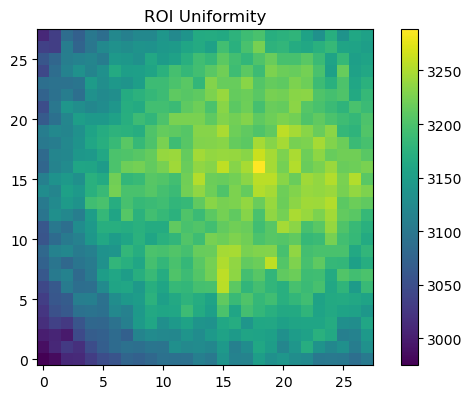

ROI Uniformity: 1.7203207052116078 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 2475.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.002646626438945532
Exposure set to 0.0026459998916834593 (err of 6.264966508056496e-07
Trial 1:
Imaging with Exposure: 0.0026459998916834593 s
+Good exposure 0.0026459998916834593 Image recieved
Quantile: 3255.0, Target: 3275.2000000000003
Exposure current Value: 0.0026459998916834593
Exposure Value set to 0.002662420505657792
Exposure set to 0.002662000013515353 (err of 4.205226572014803e-07
Trial 2:
Imaging with Exposure: 0.002662000013515353 s
+Good exposure 0.002662000013515353 Image recieved
Quantile: 3291.0, Target: 3275.2000

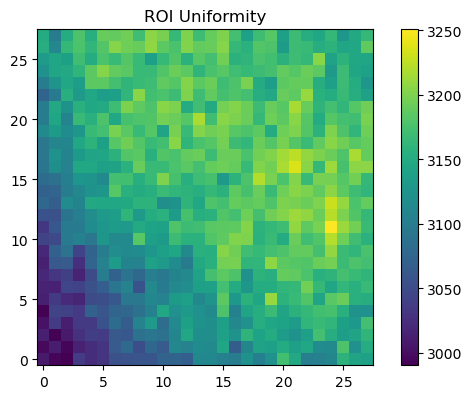

ROI Uniformity: 1.5330318487310803 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1012.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.006472727749496698
Exposure set to 0.006471999920904636 (err of 7.276592606858187e-07
Trial 1:
Imaging with Exposure: 0.006471999920904636 s
+Good exposure 0.006471999920904636 Image recieved
Quantile: 3215.0, Target: 3275.2000000000003
Exposure current Value: 0.006471999920904636
Exposure Value set to 0.006593186408281326
Exposure set to 0.006593000143766403 (err of 1.8621422640148488e-07
Trial 2:
Imaging with Exposure: 0.006593000143766403 s
+Good exposure 0.006593000143766403 Image recieved
Quantile: 3282.0, Target: 3275.2000000

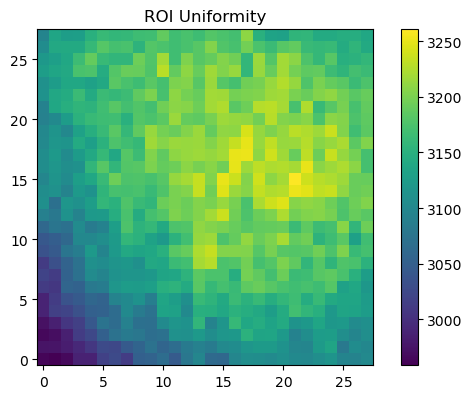

ROI Uniformity: 1.8105427549204414 %
-----------------------------------


In [7]:
osc.check_channel_roi_uniformity(cameras)

# Calibration Functions

Here we define simple functions for controlling the cameras during the calibration routines.

In [8]:
def camera_calibration_sequence(camera, subject) -> pd.DataFrame:
    """Capture pairs of images with increasing exposure time until all
    pixels are saturated, then decrease exposure time until no pixels are 
    saturated.
    
    Args:
        camera: Camera object to capture images from.
    
    Returns:
        DataFrame with columns:
            - exposure
            - mean
            - std
    """
    camera.set_property('Exposure', 'Auto', 0, 'Switch')        
    t_min = 1.0/16666 # (seconds) verify that this is the minimum exposure time
    t_max = 50.0
    t_exp = t_min
    up_scale = 1.2
    dwn_scale = 0.99
    t_scale = up_scale
    img_type='calibration'
    stop = False    
    cmd_exposures = []
    exposures = []
    means = []
    stds = []
    shots = []
    sat_val = camera.max_dn
    while stop is False:
        print(f'Exposure: {t_exp:.7f} s')
        camera.set_property('Exposure', 'Value', t_exp, 'AbsoluteValue')
        img_1 = camera.image_capture(roi=True)
        img_2 = camera.image_capture(roi=True)
        name_1 = f'{t_exp*1E6:.0f}us_1'
        name_2 = f'{t_exp*1E6:.0f}us_2'
        camera.save_image(name_1, subject, img_type, img_1)
        camera.save_image(name_2, subject, img_type, img_2)
        exposures.append(camera.get_exposure_value())
        cmd_exposures.append(t_exp)
        mean = np.mean([np.mean(img_1), np.mean(img_2)])
        std = np.mean([np.std(img_1), np.std(img_2)])
        shot = np.sqrt(np.mean((img_1 - img_2)**2)/2)
        means.append(mean)
        stds.append(std)
        shots.append(shot)
        if mean >= sat_val * 0.999:
            t_scale = dwn_scale
        if t_scale == dwn_scale:
            # n_sat = (np.sum(img_1 == sat_val) + np.sum(img_2 == sat_val)) / 2
            if mean <= sat_val * 0.80:
                stop = True
        else:
            if t_exp*t_scale > t_max:
                t_scale = dwn_scale
        t_exp = t_exp * t_scale

    results = pd.DataFrame({'exposure': exposures, 'raw mean': means, 'raw standard deviation': stds, 'shot and read noise': shots})
    results.sort_values('exposure', inplace=True)

    print(results)

    cwl_str = str(int(camera.camera_props['cwl']))
    channel = str(camera.camera_props['number'])+'_'+cwl_str
    subject_dir = Path('..', 'data', subject, channel)
    subject_dir.mkdir(parents=True, exist_ok=True)
    filename = 'exposures.csv'
    img_file =str(Path(subject_dir, filename).with_suffix('.tif'))

    results['exposure'].to_csv(f'{subject}_exposures.csv', index=False)

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    ax[0].plot(results['exposure'], results['raw mean'])
    ax[0].set_xlabel('Exposure (s)')
    ax[0].set_ylabel('Mean Pixel Value')
    results.sort_values('raw mean', inplace=True)
    ax[1].loglog(results['raw mean'], results['raw standard deviation'], label='Total Noise')
    ax[1].loglog(results['raw mean'], results['shot and read noise'], label='Shot and Read Noise')
    ax[1].set_xlabel('Mean Pixel Value')
    ax[1].set_ylabel('Standard Deviation')
    plt.show()
    return cmd_exposures

# SCT99 Procedure

Output:
- SCT99 Exposure List
- SCT99 Lit Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_130623\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_130623\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_130623\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data

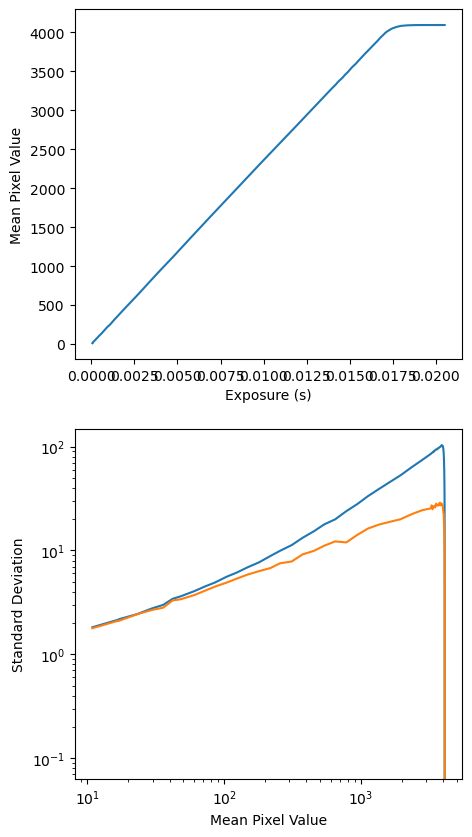

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_130623\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_130623\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_130623\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data

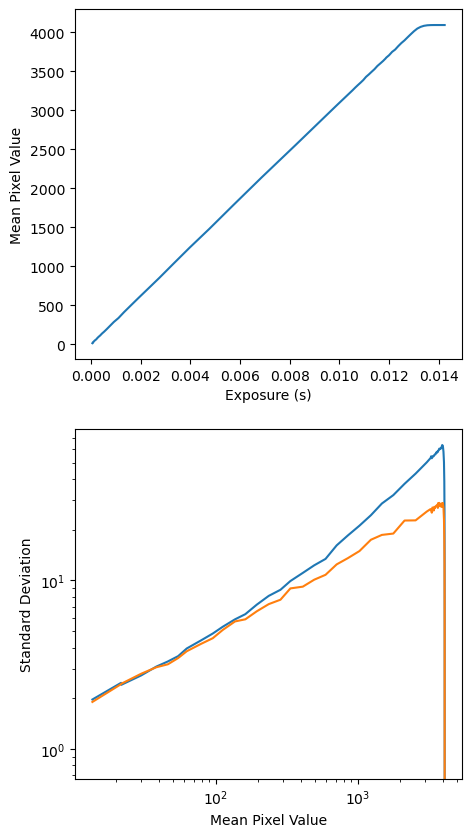

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_130623\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_130623\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_130623\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data

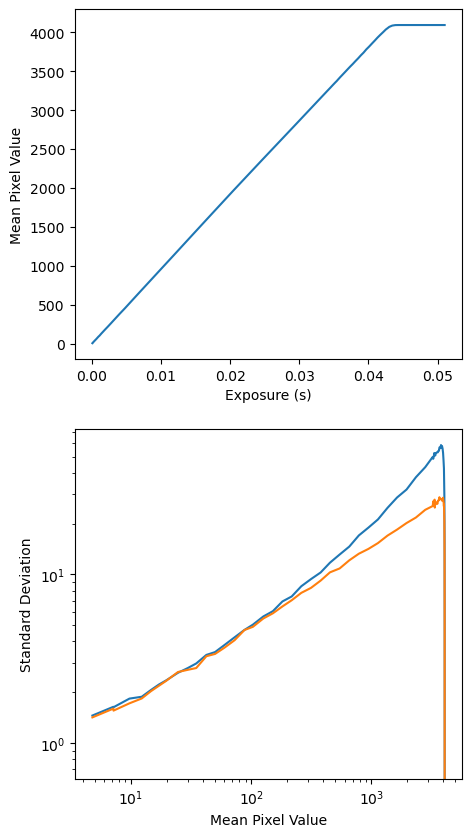

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_130623\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_130623\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_130623\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data

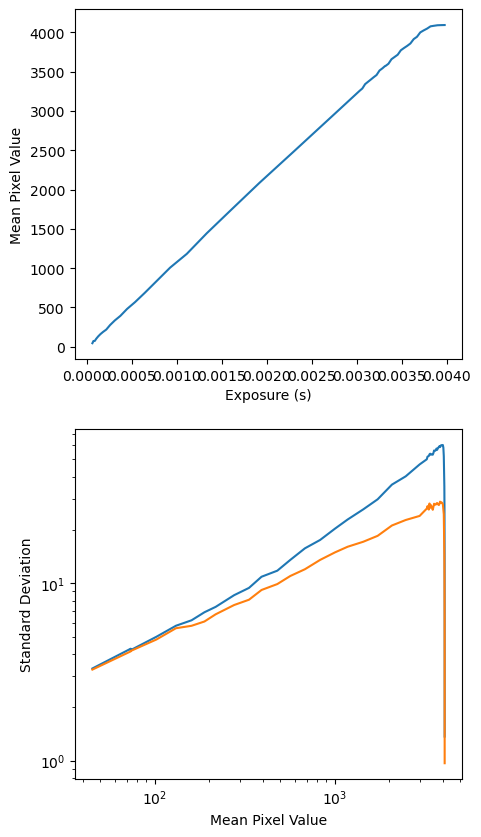

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_130623\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_130623\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_130623\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data

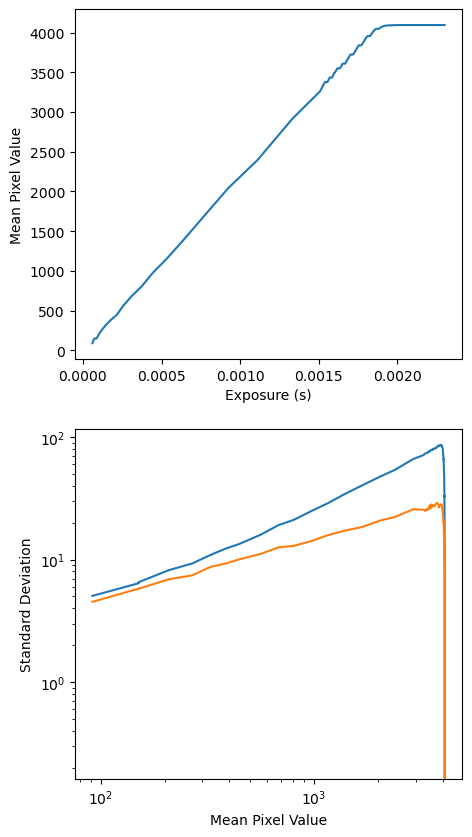

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_130623\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_130623\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_130623\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data

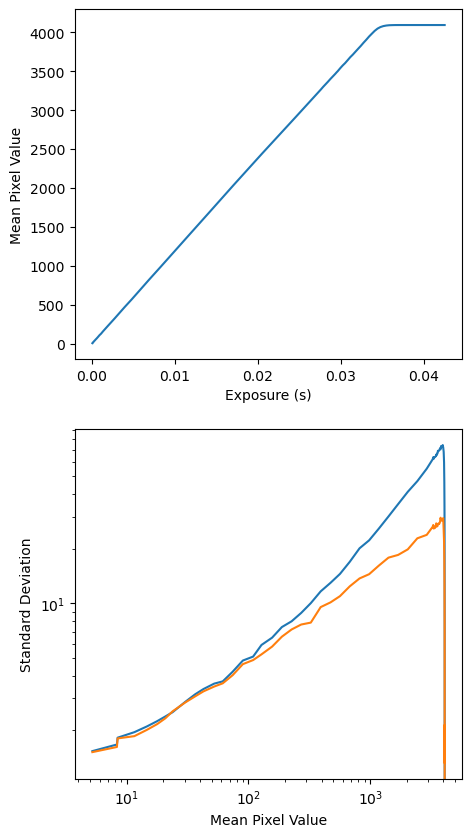

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_130623\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_130623\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_130623\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data

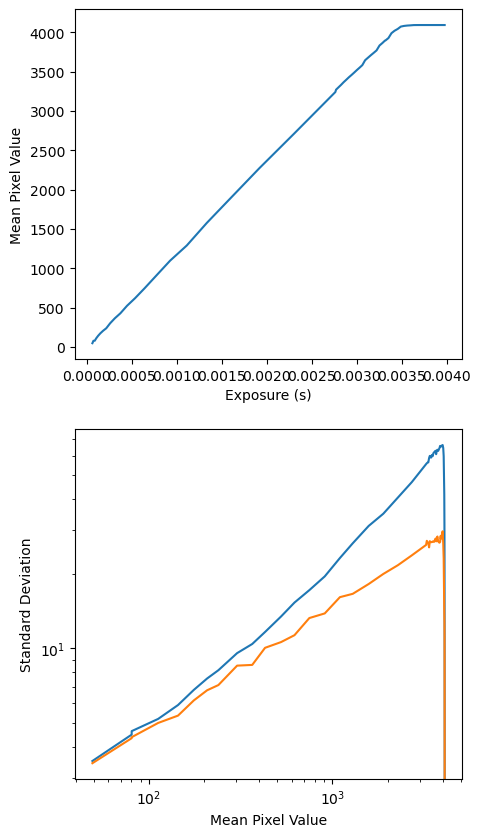

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99_130623\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99_130623\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99_130623\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data

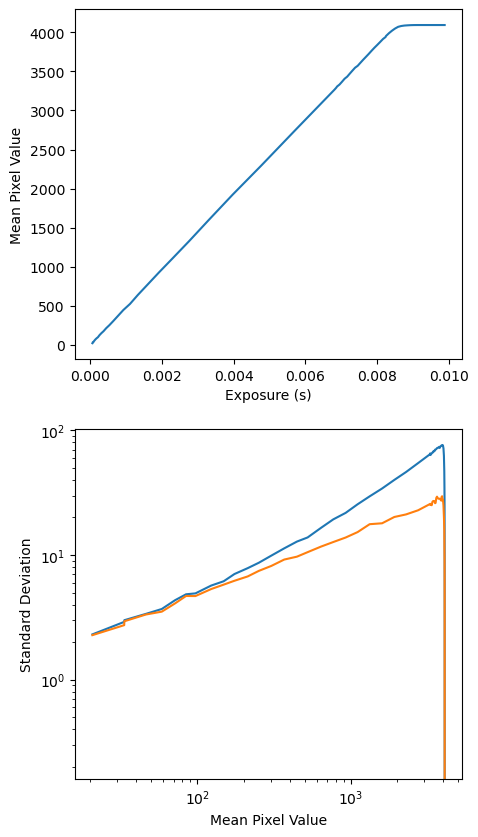

In [9]:
sct99_exposures = {}
for camera in cameras:
    sct99_exposures[camera] = camera_calibration_sequence(camera, 'SCT99_130623')

# SCT5 Procedure

Output:
- SCT5 Exposure List
- SCT5 Lit Image Directory

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 34.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.9632941484451294
Exposure set to 0.9632940292358398 (err of 1.3416523447773443e-07
Trial 1:
Imaging with Exposure: 0.9632940292358398 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.9632940292358398 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.9632940292358398
Exposure Value set to 0.15412704646587372
Exposure set to 0.15412700176239014 (err of 4.29153442504937e-08
Trial 2:
Imaging with Exposure: 0.15412700176239014 s
+Good exposure

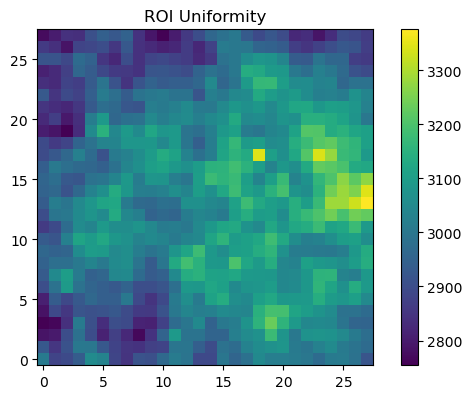

ROI Uniformity: 3.524075031271124 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 38.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.8618947863578796
Exposure set to 0.8618940114974976 (err of 7.662824111909217e-07
Trial 1:
Imaging with Exposure: 0.8618940114974976 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.8618940114974976 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.8618940114974976
Exposure Value set to 0.13790303468704224
Exposure set to 0.13790300488471985 (err of 3.6954879767403526

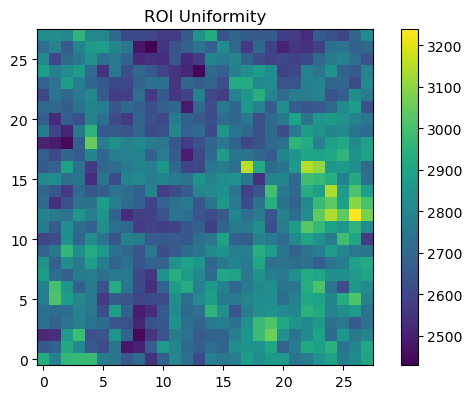

ROI Uniformity: 4.366161929912836 %
-----------------------------------
-----------------------------------
Device 2
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3227.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.002029872965067625
Exposure set to 0.0020290000829845667 (err of 8.729604388311822e-07
Trial 1:
Imaging with Exposure: 0.0020290000829845667 s
+Good exposure 0.0020290000829845667 Image recieved
Quantile: 15.0, Target: 3275.2000000000003
Exposure current Value: 0.0020290000829845667
Exposure Value set to 2.2151269912719727
Exposure set to 2.2151260375976562 (err of 9.863326946302209e-07
Trial 2:
Imaging with Exposure: 2.2151260375976562 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposur

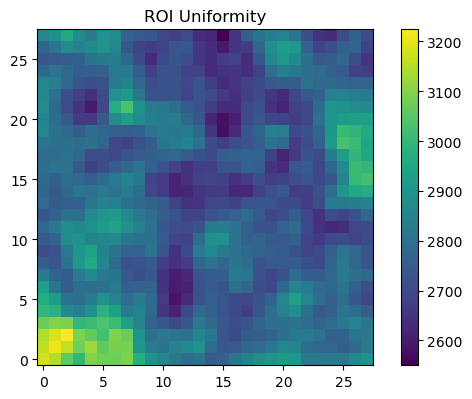

ROI Uniformity: 3.7390934757071155 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 124.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.26412904262542725
Exposure set to 0.26412901282310486 (err of 3.198041548246877e-08
Trial 1:
Imaging with Exposure: 0.26412901282310486 s
+Good exposure 0.26412901282310486 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.26412901282310486
Exposure Value set to 0.04226064309477806
Exposure set to 0.04225999861955643 (err of 6.434321403528398e-07
Trial 2:
Imaging with Exposure: 0.04225999861955643 s
+Good exposure 0.04225999861955643 Image recieved
Quantile: 2559.0, Target: 3275.2000000000003
Expo

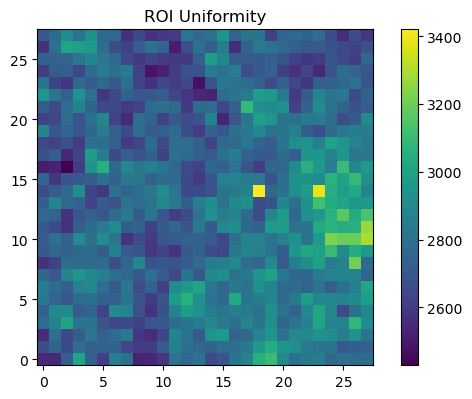

ROI Uniformity: 4.7257817191534155 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 271.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.12085609138011932
Exposure set to 0.12085600197315216 (err of 9.23280896319989e-08
Trial 1:
Imaging with Exposure: 0.12085600197315216 s
+Good exposure 0.12085600197315216 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.12085600197315216
Exposure Value set to 0.019336961209774017
Exposure set to 0.019336000084877014 (err of 9.602308273307103e-07
Trial 2:
Imaging with Exposure: 0.019336000084877014 s
+Good exposure 0.019336000084877014 Image recieved
Quantile: 2581.0, Target: 3275.2000000000003
E

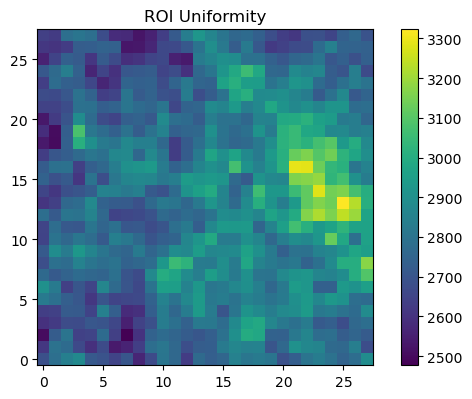

ROI Uniformity: 4.689531751115614 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 19.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 1.7237895727157593
Exposure set to 1.7237889766693115 (err of 5.788905059755933e-07
Trial 1:
Imaging with Exposure: 1.7237889766693115 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 1.7237889766693115 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 1.7237889766693115
Exposure Value set to 0.2758062481880188
Exposure set to 0.2758060097694397 (err of 2.2649765013538214e-

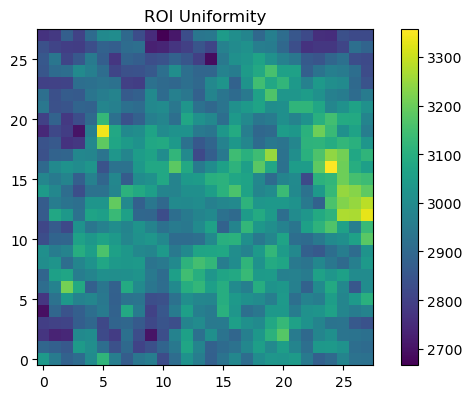

ROI Uniformity: 3.5093080554723732 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 133.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.24625565111637115
Exposure set to 0.24625499546527863 (err of 6.553289809696494e-07
Trial 1:
Imaging with Exposure: 0.24625499546527863 s
+Good exposure 0.24625499546527863 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.24625499546527863
Exposure Value set to 0.03940080106258392
Exposure set to 0.039400000125169754 (err of 7.991492748243845e-07
Trial 2:
Imaging with Exposure: 0.039400000125169754 s
+Good exposure 0.039400000125169754 Image recieved
Quantile: 2568.0, Target: 3275.2000000000003
E

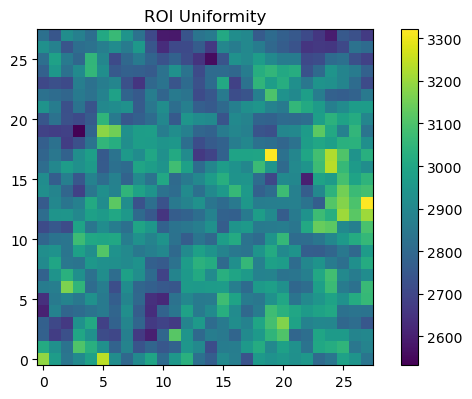

ROI Uniformity: 4.044599340534204 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 62.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.5282580852508545
Exposure set to 0.5282580256462097 (err of 6.396083096493754e-08
Trial 1:
Imaging with Exposure: 0.5282580256462097 s
Setting Frame Rate to : 1.0 FPS
set frame rate err: 1
Frame Rate set to : 977 FPS
+Good exposure 0.5282580256462097 Image recieved
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.5282580256462097
Exposure Value set to 0.08452128618955612
Exposure set to 0.08452100306749344 (err of 2.810359001209628e

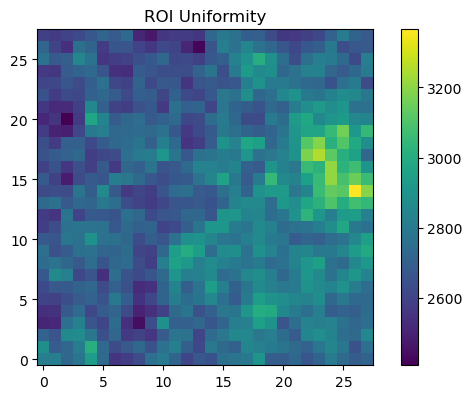

ROI Uniformity: 4.739680291806754 %
-----------------------------------


In [11]:
osc.check_channel_roi_uniformity(cameras)

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_130623\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_130623\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_130623\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SC

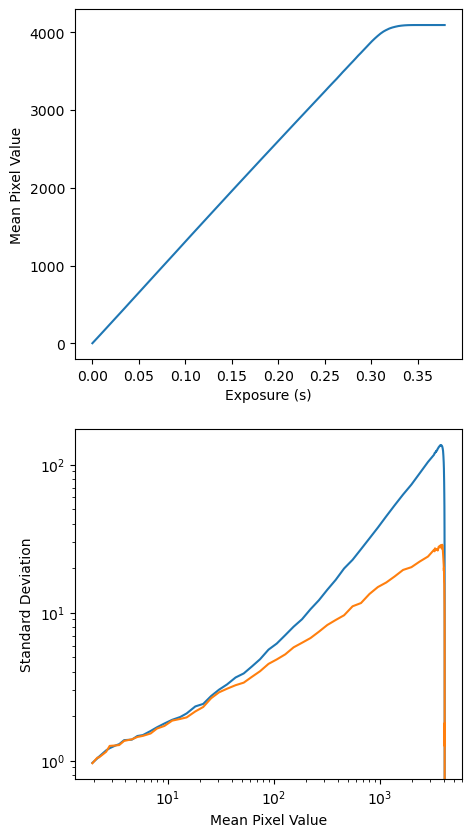

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_130623\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_130623\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_130623\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SC

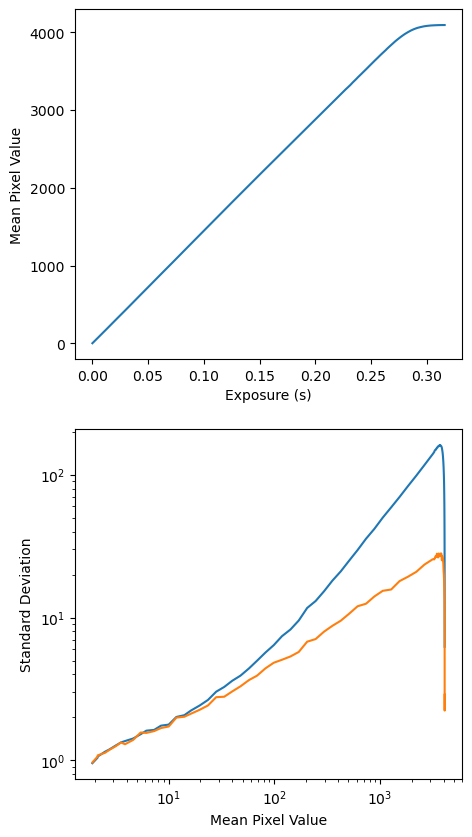

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_130623\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_130623\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_130623\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SC

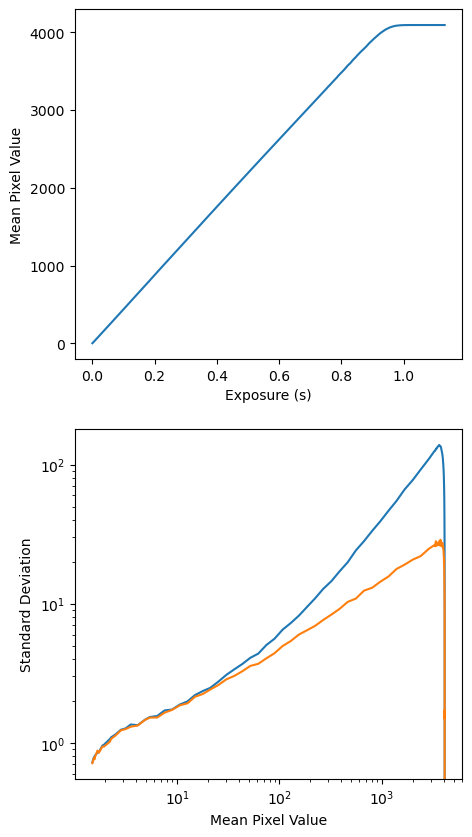

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_130623\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_130623\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_130623\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SC

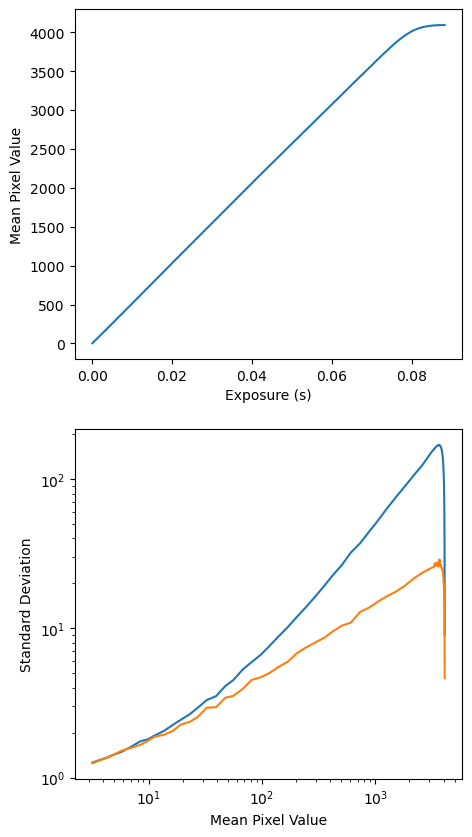

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_130623\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_130623\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_130623\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SC

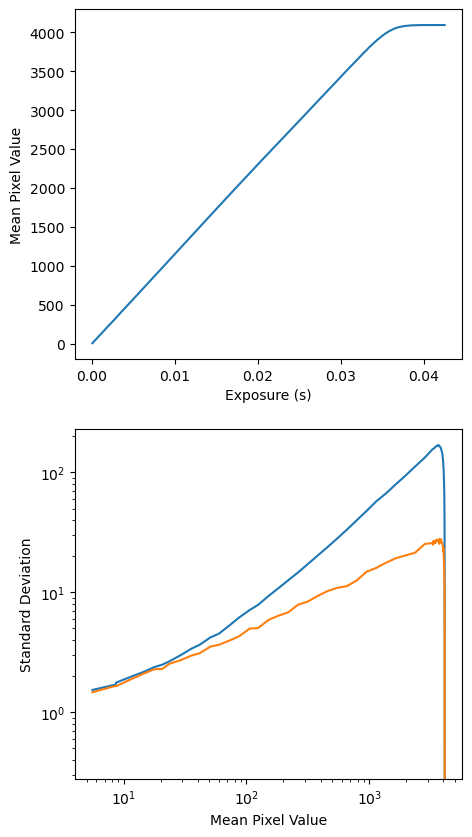

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_130623\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_130623\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_130623\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SC

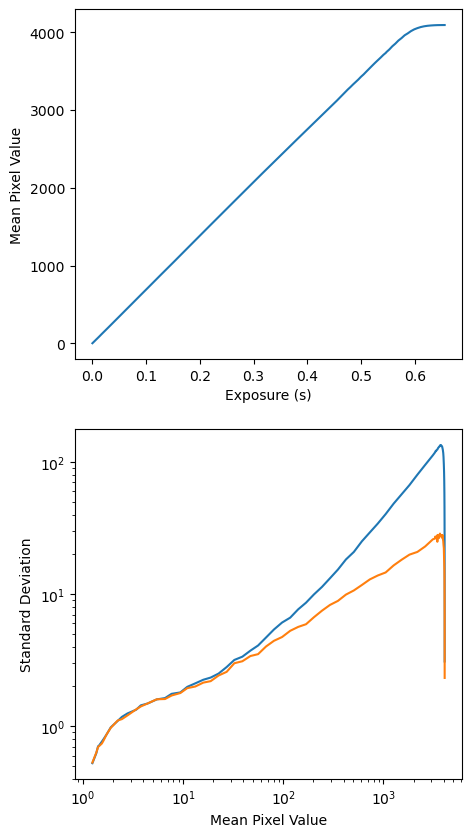

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_130623\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_130623\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_130623\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SC

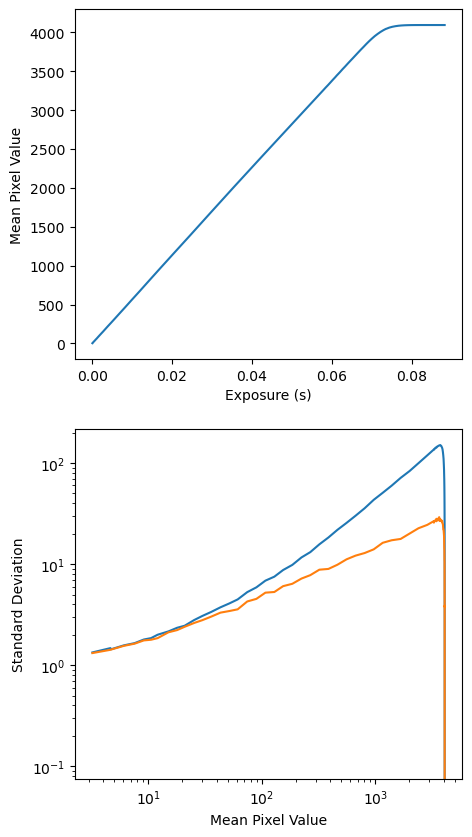

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5_130623\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5_130623\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5_130623\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SC

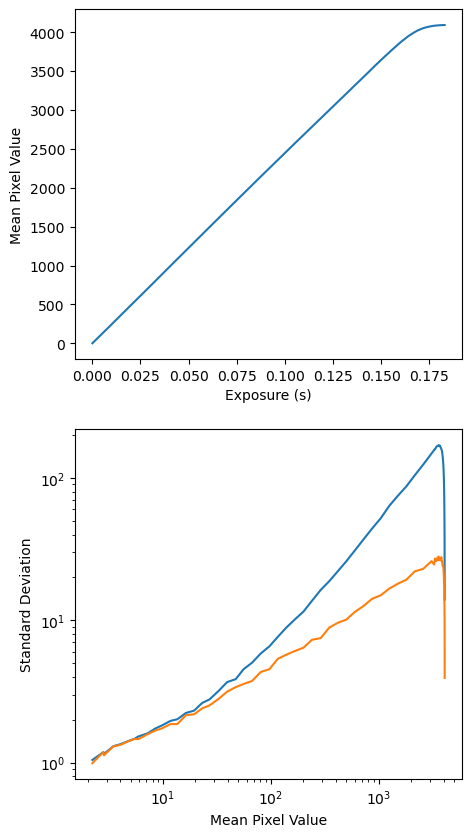

In [12]:
sct5_exposures = {}
for camera in cameras:
    sct5_exposures[camera] = camera_calibration_sequence(camera, 'SCT5_130623')

# Dark Signal Procedure

Output:
- Dark Exposure List
- Dark Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_130623\0_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_130623\0_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_130623\0_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\da

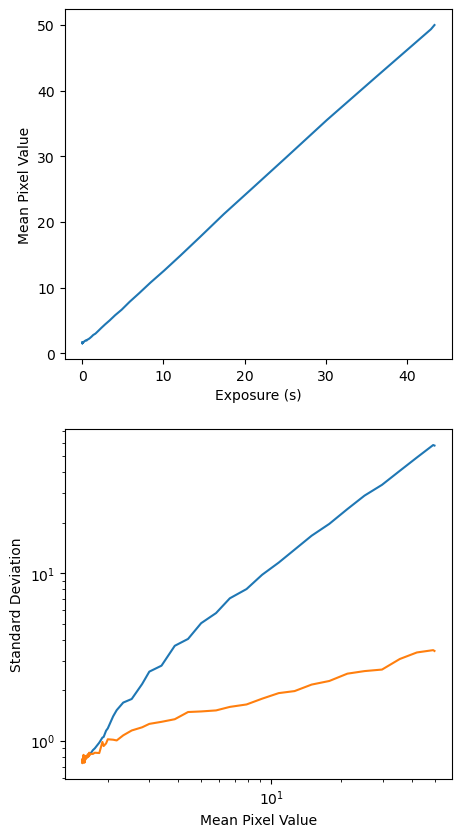

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_130623\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_130623\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_130623\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\da

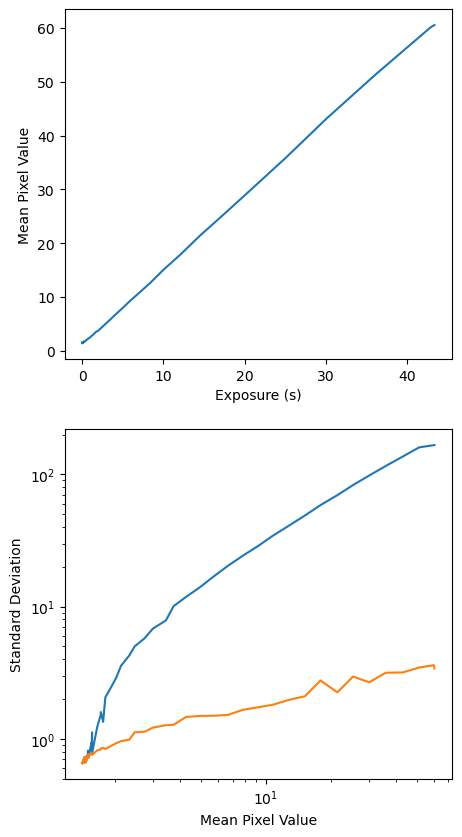

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_130623\2_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_130623\2_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_130623\2_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\da

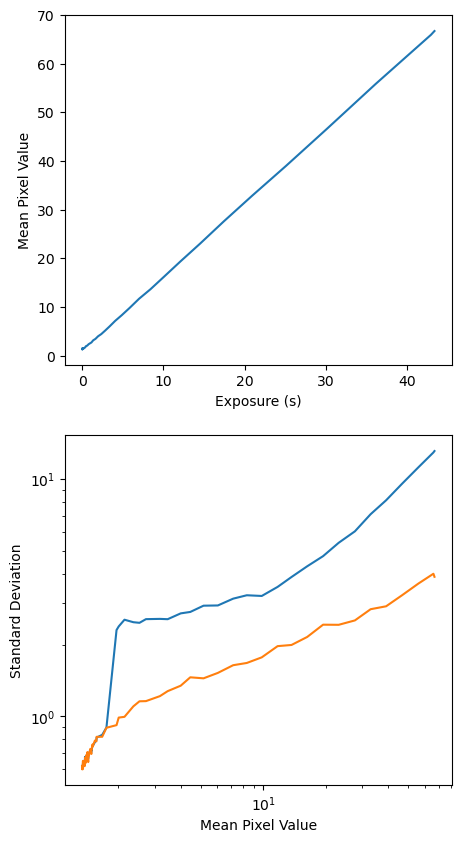

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_130623\3_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_130623\3_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_130623\3_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\da

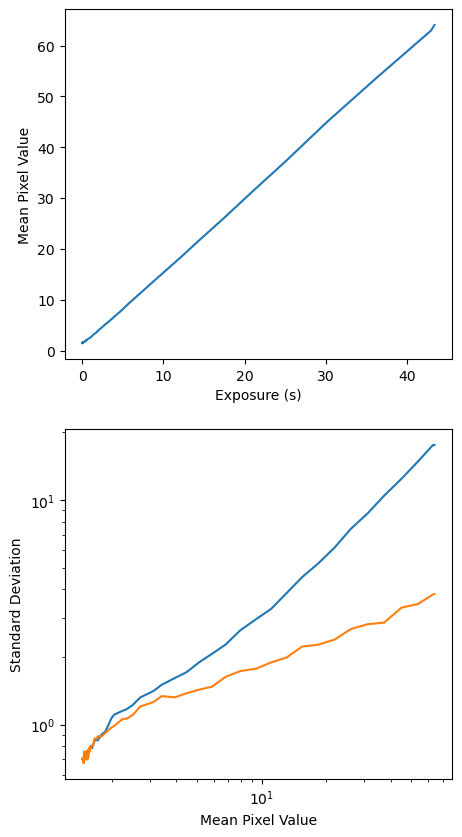

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_130623\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_130623\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_130623\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\da

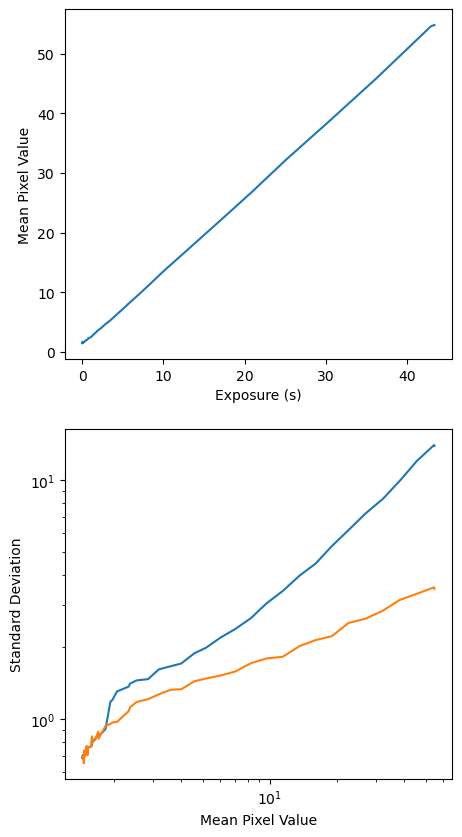

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_130623\5_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_130623\5_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_130623\5_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\da

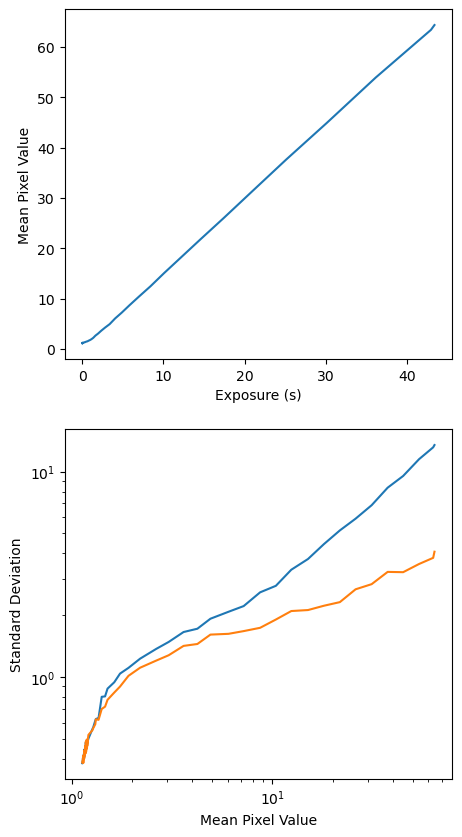

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_130623\7_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_130623\7_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_130623\7_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\da

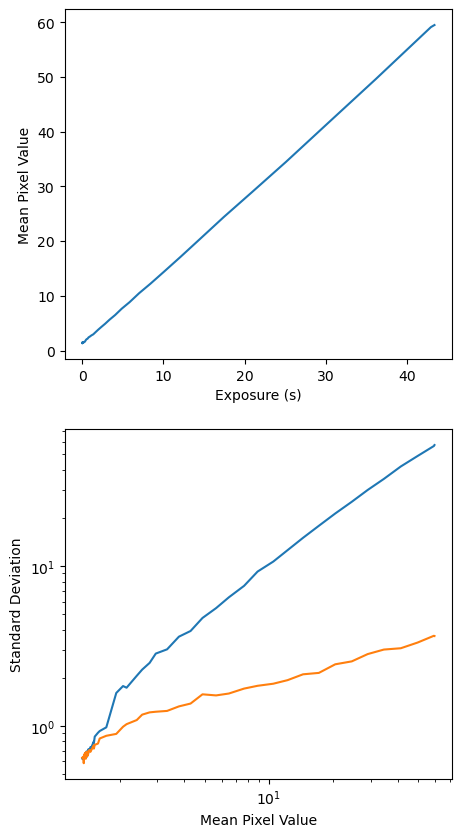

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_130623\6_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_130623\6_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\dark_130623\6_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\da

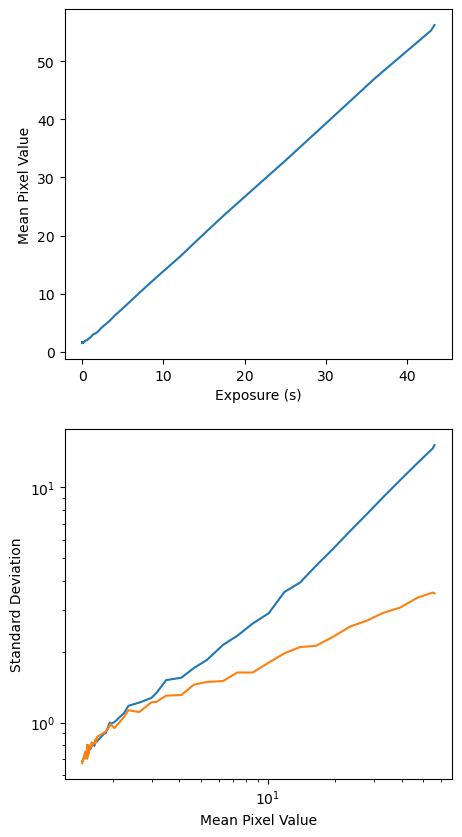

In [13]:
for camera in cameras:
    dark_exposures = camera_calibration_sequence(camera, 'dark_130623')

# Dark Frame Capture

Output:
- addition of dark mean frames to SCT99 directory
- addition of dark mean frames to SCT5 directory

In [14]:
for camera in cameras:
    exposures = sct99_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT99_130623', 'drk', drk_ave)

Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.9

In [15]:
for camera in cameras:
    exposures = sct5_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT5_130623', 'drk', drk_ave)

Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.9